# Importando...

In [ ]:
#Imports
import numpy as np
import sklearn
import pandas as pd
import random
import re
import scipy
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, cross_validate, RandomizedSearchCV, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
#from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from scipy.stats import reciprocal, chi2_contingency
from functools import partial
# Install or upgrade scikit-learn
#!pip install -U scikit-learn

# Import KMeans and silhouette_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/CodonProject
#All file paths should be relative to this now
#this will help when the proyect is uploaded as directory to github

/content/drive/MyDrive/CodonProject


# USANDO codon_usage.csv

In [ ]:
#Import data
data = pd.read_csv("/content/drive/MyDrive/CodonProject/codon_usage.csv",delimiter=",")

<ipython-input-4-0ba151e46eb1>:2: DtypeWarning: Columns (5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("/content/drive/MyDrive/CodonProject/codon_usage.csv",delimiter=",")


In [ ]:
data.head()

,Kingdom,DNAtype,SpeciesID,Ncodons,SpeciesName,UUU,UUC,UUA,UUG,CUU,...,CGG,AGA,AGG,GAU,GAC,GAA,GAG,UAA,UAG,UGA
0,vrl,0,100217,1995,Epizootic haematopoietic necrosis virus,0.01654,0.01203,0.00050,0.00351,0.01203,...,0.00451,0.01303,0.03559,0.01003,0.04612,0.01203,0.04361,0.00251,0.00050,0.00000
1,vrl,0,100220,1474,Bohle iridovirus,0.02714,0.01357,0.00068,0.00678,0.00407,...,0.00136,0.01696,0.03596,0.01221,0.04545,0.01560,0.04410,0.00271,0.00068,0.00000
2,vrl,0,100755,4862,Sweet potato leaf curl virus,0.01974,0.0218,0.01357,0.01543,0.00782,...,0.00596,0.01974,0.02489,0.03126,0.02036,0.02242,0.02468,0.00391,0.00000,0.00144
3,vrl,0,100880,1915,Northern cereal mosaic virus,0.01775,0.02245,0.01619,0.00992,0.01567,...,0.00366,0.01410,0.01671,0.03760,0.01932,0.03029,0.03446,0.00261,0.00157,0.00000
4,vrl,0,100887,22831,Soil-borne cereal mosaic virus,0.02816,0.01371,0.00767,0.03679,0.01380,...,0.00604,0.01494,0.01734,0.04148,0.02483,0.03359,0.03679,0.00000,0.00044,0.00131


In [ ]:
#Initialize Data
num_col_list = ['Ncodons','UUU','UUC','UUA','UUG','CUU','CUC','CUA','CUG','AUU','AUC','AUA','AUG','GUU','GUC','GUA','GUG','GCU','GCC','GCA','GCG','CCU','CCC','CCA','CCG','UGG','GGU','GGC','GGA','GGG','UCU','UCC','UCA','UCG','AGU','AGC','ACU','ACC','ACA','ACG','UAU','UAC','CAA','CAG','AAU','AAC','UGU','UGC','CAU','CAC','AAA','AAG','CGU','CGC','CGA','CGG','AGA','AGG','GAU','GAC','GAA','GAG','UAA','UAG','UGA']

In [ ]:
#Data for reference frequencies
freqs = data[num_col_list]
kingdom = data['Kingdom']
freqs = np.array(freqs)
kingdom = np.array(kingdom)

In [ ]:
#Data for phylogenetic classification
X = data[num_col_list]
y = data['Kingdom']
X = np.array(X)
y = np.array(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
#Exploring KMeans
def kmeans_eval(X):
    inertia_vals = [] #Generate lists
    silhouette = []
    for k in range(2,50): #Number of clusters 2 - 20
        model = KMeans(n_clusters = k, n_init = 10) #Initilize model, KMeans, 10 different initial centroids
        model.fit(X)
        s = silhouette_score(X,model.labels_)
        i = model.inertia_
        inertia_vals.append(i) #Append values
        silhouette.append(s)
        print(f'Number of clusters: {k}, Inertia: {np.around(i,3)}, Silhouette: {np.around(s,3)}')

    fig, ax = plt.subplots(2,1,figsize=(12,12))
    ax[0].set_title('Elbow Graph')  #Graph inertia like Figure 9-8
    ax[0].set_xlabel('Number of Clusters')
    ax[0].set_ylabel('Inertia / 10^11')
    ax[0].plot(range(2,50),inertia_vals,marker="*")
    ax[1].set_title('Silhouette for Different Clusters') #Graph silhouette like Figure 9-9
    ax[1].set_xlabel('Number of Clusters')
    ax[1].set_ylabel('Silhouette Score')
    ax[1].plot(range(2,50),silhouette,marker="*")
    plt.show


kmeans_eval(X_train) #Run

ValueError: ignored

In [ ]:
#Look at prediction power for 'true' number of clusters
kmean_clf = KMeans(n_clusters = 5)
y_pred = kmean_clf.fit_predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
# Reduce the dimensions for visualization (to 2D)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_test_reduced = pca.fit_transform(X_test)

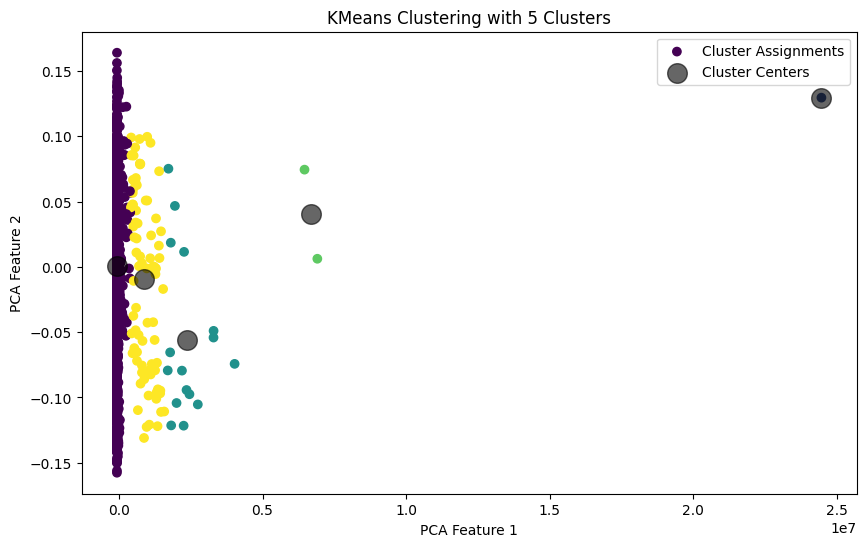

In [ ]:
# Plotting the results
plt.figure(figsize=(10, 6))

# Plot the reduced data points
plt.scatter(X_test_reduced[:, 0], X_test_reduced[:, 1], c=y_pred, cmap='viridis', label='Cluster Assignments')

# Mark the cluster centers
centers = pca.transform(kmean_clf.cluster_centers_)
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.6, label='Cluster Centers')

plt.title('KMeans Clustering with 5 Clusters')
plt.xlabel('PCA Feature 1')
plt.ylabel('PCA Feature 2')
plt.legend()
plt.show()

# USANDO el dfkingdomFreq

Usando el df de Frecuencias que contiene las frecuencias en cada codon como en codon_usage.csv que está limpio en ese caso:

In [ ]:
import pickle
with open("dfkingdomFreq.pkl", "rb") as file:
    dfkingdomFreq = pickle.load(file)

In [ ]:
dfkingdomFreq.head()

,Kingdom,DNAtype,SpeciesID,Ncodons,SpeciesName,UUU,UUC,UUA,UUG,CUU,...,CGG,AGA,AGG,GAU,GAC,GAA,GAG,UAA,UAG,UGA
0,vrl,0,100217,1995,Epizootic haematopoietic necrosis virus,0.01654,0.01203,0.00050,0.00351,0.01203,...,0.00451,0.01303,0.03559,0.01003,0.04612,0.01203,0.04361,0.00251,0.00050,0.00000
1,vrl,0,100220,1474,Bohle iridovirus,0.02714,0.01357,0.00068,0.00678,0.00407,...,0.00136,0.01696,0.03596,0.01221,0.04545,0.01560,0.04410,0.00271,0.00068,0.00000
2,vrl,0,100755,4862,Sweet potato leaf curl virus,0.01974,0.02180,0.01357,0.01543,0.00782,...,0.00596,0.01974,0.02489,0.03126,0.02036,0.02242,0.02468,0.00391,0.00000,0.00144
3,vrl,0,100880,1915,Northern cereal mosaic virus,0.01775,0.02245,0.01619,0.00992,0.01567,...,0.00366,0.01410,0.01671,0.03760,0.01932,0.03029,0.03446,0.00261,0.00157,0.00000
4,vrl,0,100887,22831,Soil-borne cereal mosaic virus,0.02816,0.01371,0.00767,0.03679,0.01380,...,0.00604,0.01494,0.01734,0.04148,0.02483,0.03359,0.03679,0.00000,0.00044,0.00131


In [ ]:
#Initialize Data
num_col_list = ['Ncodons','UUU','UUC','UUA','UUG','CUU','CUC','CUA','CUG','AUU','AUC','AUA','AUG','GUU','GUC','GUA','GUG','GCU','GCC','GCA','GCG','CCU','CCC','CCA','CCG','UGG','GGU','GGC','GGA','GGG','UCU','UCC','UCA','UCG','AGU','AGC','ACU','ACC','ACA','ACG','UAU','UAC','CAA','CAG','AAU','AAC','UGU','UGC','CAU','CAC','AAA','AAG','CGU','CGC','CGA','CGG','AGA','AGG','GAU','GAC','GAA','GAG','UAA','UAG','UGA']

#Data for reference frequencies
freqs = dfkingdomFreq[num_col_list]
kingdom = dfkingdomFreq['Kingdom']
freqs = np.array(freqs)
kingdom = np.array(kingdom)

#Data for phylogenetic classification
X = dfkingdomFreq[num_col_list]
y = dfkingdomFreq['Kingdom']
X = np.array(X)
y = np.array(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Number of clusters: 2, Inertia: 1773470283436629.0, Silhouette: 0.995
Number of clusters: 3, Inertia: 963166502290265.1, Silhouette: 0.962
Number of clusters: 4, Inertia: 509431624362202.9, Silhouette: 0.961
Number of clusters: 5, Inertia: 286134425049382.9, Silhouette: 0.961
Number of clusters: 6, Inertia: 206800965737572.56, Silhouette: 0.955
Number of clusters: 7, Inertia: 151745172582536.38, Silhouette: 0.955
Number of clusters: 8, Inertia: 108573521833730.25, Silhouette: 0.955
Number of clusters: 9, Inertia: 73116760553175.95, Silhouette: 0.955
Number of clusters: 10, Inertia: 51907524519662.21, Silhouette: 0.956
Number of clusters: 11, Inertia: 42058491338669.16, Silhouette: 0.948
Number of clusters: 12, Inertia: 34450959258648.97, Silhouette: 0.948
Number of clusters: 13, Inertia: 27212666373047.96, Silhouette: 0.947
Number of clusters: 14, Inertia: 22548618456418.438, Silhouette: 0.947
Number of clusters: 15, Inertia: 18979612532226.023, Silhouette: 0.908
Number of clusters: 16

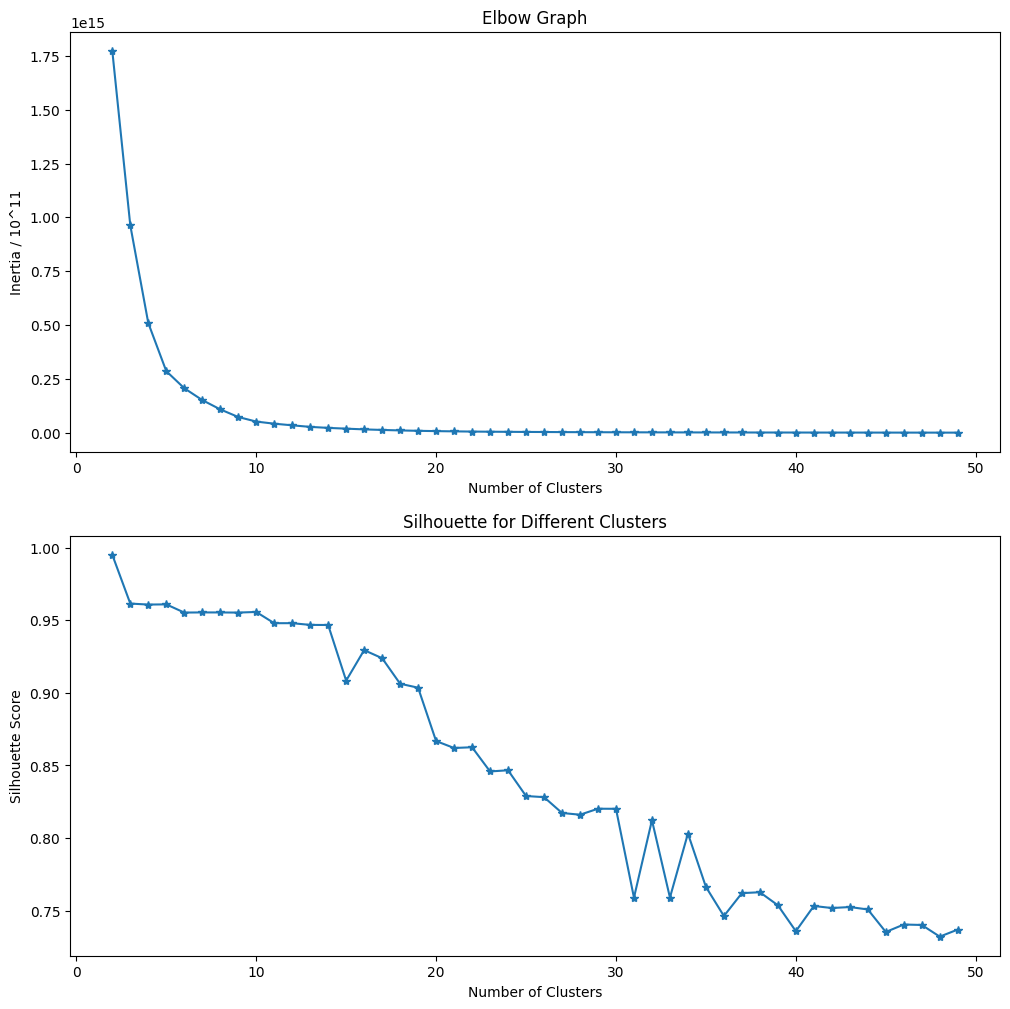

In [ ]:
#Exploring KMeans
def kmeans_eval(X):
    inertia_vals = [] #Generate lists
    silhouette = []
    for k in range(2,50): #Number of clusters 2 - 20
        model = KMeans(n_clusters = k, n_init = 10) #Initilize model, KMeans, 10 different initial centroids
        model.fit(X)
        s = silhouette_score(X,model.labels_)
        i = model.inertia_
        inertia_vals.append(i) #Append values
        silhouette.append(s)
        print(f'Number of clusters: {k}, Inertia: {np.around(i,3)}, Silhouette: {np.around(s,3)}')

    fig, ax = plt.subplots(2,1,figsize=(12,12))
    ax[0].set_title('Elbow Graph')  #Graph inertia like Figure 9-8
    ax[0].set_xlabel('Number of Clusters')
    ax[0].set_ylabel('Inertia / 10^11')
    ax[0].plot(range(2,50),inertia_vals,marker="*")
    ax[1].set_title('Silhouette for Different Clusters') #Graph silhouette like Figure 9-9
    ax[1].set_xlabel('Number of Clusters')
    ax[1].set_ylabel('Silhouette Score')
    ax[1].plot(range(2,50),silhouette,marker="*")
    plt.show


kmeans_eval(X_train) #Run

## Probando con K = 3

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [ ]:
# Initialize KMeans with 3 clusters
kmeans = KMeans(n_clusters=3)
# Fit the model to your data (X_train)
kmeans.fit(X_train)
#
y_pred = kmeans.fit_predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
#Get the cluster assignments for each data point
labels = kmeans.labels_
labels

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [ ]:
#Can help
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_test_encoded = label_encoder.fit_transform(y_test)
y_test_encoded

array([1, 9, 8, ..., 1, 1, 5])

 ### Probando PCA y visualizacion

In [ ]:
from sklearn.decomposition import PCA

# Initialize PCA with 2 components
pca = PCA(n_components=2)

# Fit and transform the data
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [ ]:
import pandas as pd

# Create a DataFrame with PCA results and cluster labels for test data
df_pca = pd.DataFrame(X_test_pca, columns=['PC1', 'PC2'])
df_pca['Cluster'] = y_pred

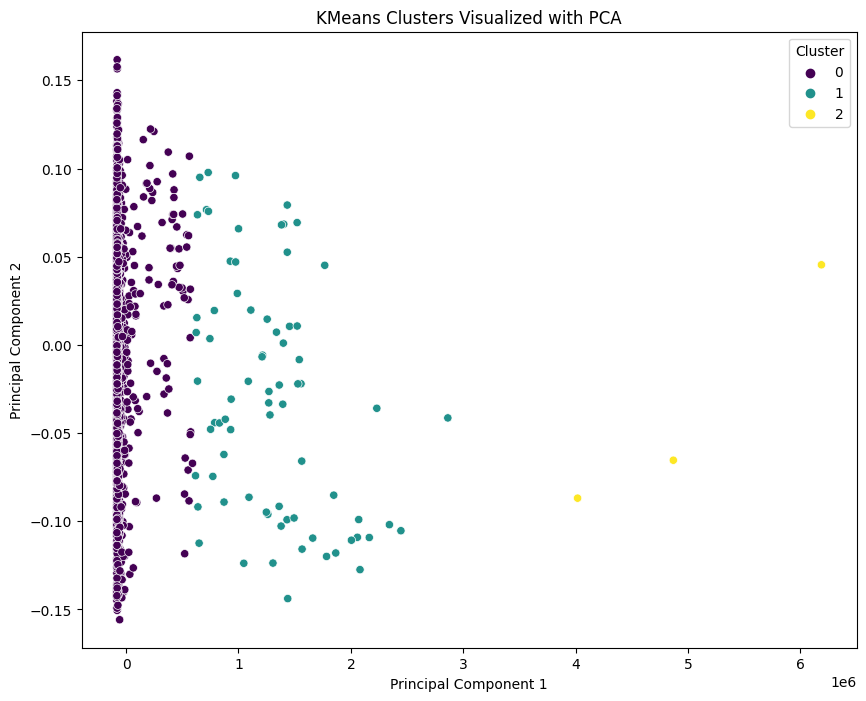

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a scatter plot
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=df_pca, palette='viridis')

# Add titles and labels
plt.title('KMeans Clusters Visualized with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Show the plot
plt.show()

## Probando con K = 5


In [ ]:
# Initialize KMeans with 3 clusters
kmeans3 = KMeans(n_clusters=5)
# Fit the model to your data (X_train)
kmeans3.fit(X_train)
#
y_pred = kmeans3.fit_predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
from sklearn.decomposition import PCA

# Initialize PCA with 2 components
pca = PCA(n_components=2)

# Fit and transform the data
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [ ]:
import pandas as pd

# Create a DataFrame with PCA results and cluster labels for test data
df_pca = pd.DataFrame(X_test_pca, columns=['PC1', 'PC2'])
df_pca['Cluster'] = y_pred

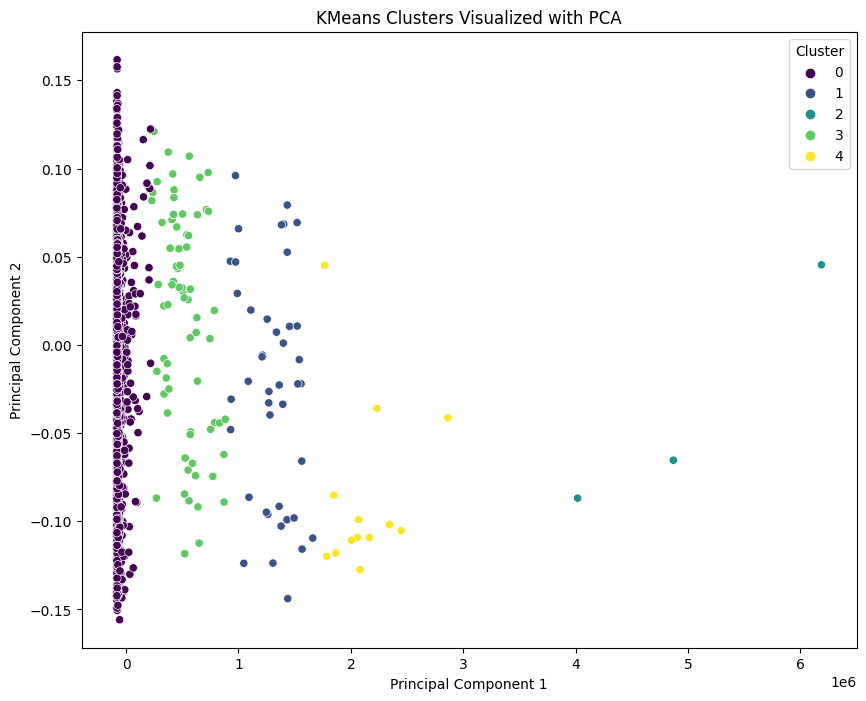

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a scatter plot
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=df_pca, palette='viridis')

# Add titles and labels
plt.title('KMeans Clusters Visualized with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Show the plot
plt.show()

# USANDO dfdomainRSCU_cleaned

In [ ]:
import pickle
with open("dfdomainRSCU_cleaned.pkl", "rb") as file:
    dfdomainRSCU_cleaned = pickle.load(file)

In [ ]:
dfdomainRSCU_cleaned.head()

,Kingdom,DNAtype,SpeciesID,Ncodons,SpeciesName,UUU,UUC,UUA,UUG,CUU,...,CGG,AGA,AGG,GAU,GAC,GAA,GAG,UAA,UAG,UGA
0,vrl,0.0,100217.0,1995.0,Epizootic haematopoietic necrosis virus,1.157895,0.842105,0.033708,0.235955,0.808989,...,0.397059,1.147059,3.132353,0.357143,1.642857,0.432432,1.567568,2.500000,0.500,0.000000
1,vrl,0.0,100220.0,1474.0,Bohle iridovirus,1.333333,0.666667,0.047244,0.472441,0.283465,...,0.127660,1.595745,3.382979,0.423529,1.576471,0.522727,1.477273,2.400000,0.600,0.000000
2,vrl,0.0,100755.0,4862.0,Sweet potato leaf curl virus,0.950495,1.049505,1.161290,1.319648,0.668622,...,0.480663,1.591160,2.005525,1.211155,0.788845,0.951965,1.048035,2.192308,0.000,0.807692
3,vrl,0.0,100880.0,1915.0,Northern cereal mosaic virus,0.883117,1.116883,1.184713,0.726115,1.146497,...,0.477273,1.840909,2.181818,1.321101,0.678899,0.935484,1.064516,1.875000,1.125,0.000000
4,vrl,0.0,100887.0,22831.0,Soil-borne cereal mosaic virus,1.345188,0.654812,0.515464,2.474227,0.927835,...,0.626324,1.547655,1.797277,1.250991,0.749009,0.954574,1.045426,0.000000,0.750,2.250000


In [ ]:
#Initialize Data
num_col_list = ['Ncodons','UUU','UUC','UUA','UUG','CUU','CUC','CUA','CUG','AUU','AUC','AUA','AUG','GUU','GUC','GUA','GUG','GCU','GCC','GCA','GCG','CCU','CCC','CCA','CCG','UGG','GGU','GGC','GGA','GGG','UCU','UCC','UCA','UCG','AGU','AGC','ACU','ACC','ACA','ACG','UAU','UAC','CAA','CAG','AAU','AAC','UGU','UGC','CAU','CAC','AAA','AAG','CGU','CGC','CGA','CGG','AGA','AGG','GAU','GAC','GAA','GAG','UAA','UAG','UGA']

#Data for reference frequencies
freqs = dfdomainRSCU_cleaned[num_col_list]
kingdom = dfdomainRSCU_cleaned['Kingdom']
freqs = np.array(freqs)
kingdom = np.array(kingdom)
#Data for phylogenetic classification
X = dfdomainRSCU_cleaned[num_col_list]
y = dfdomainRSCU_cleaned['Kingdom']
X = np.array(X)
y = np.array(y)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.2)

Number of clusters: 2, Inertia: 1371517437472443.0, Silhouette: 0.995
Number of clusters: 3, Inertia: 594398104078474.8, Silhouette: 0.958
Number of clusters: 4, Inertia: 303860118987239.44, Silhouette: 0.958
Number of clusters: 5, Inertia: 215953902670823.3, Silhouette: 0.958
Number of clusters: 6, Inertia: 133647944312838.95, Silhouette: 0.952
Number of clusters: 7, Inertia: 82606599313218.45, Silhouette: 0.953
Number of clusters: 8, Inertia: 49790342243575.55, Silhouette: 0.953
Number of clusters: 9, Inertia: 40100386384409.23, Silhouette: 0.946
Number of clusters: 10, Inertia: 32714391575609.555, Silhouette: 0.945
Number of clusters: 11, Inertia: 27379533624504.727, Silhouette: 0.945
Number of clusters: 12, Inertia: 22268880934085.4, Silhouette: 0.945
Number of clusters: 13, Inertia: 18497839632300.84, Silhouette: 0.91
Number of clusters: 14, Inertia: 14957426115030.889, Silhouette: 0.922
Number of clusters: 15, Inertia: 12411260379818.137, Silhouette: 0.917
Number of clusters: 16,

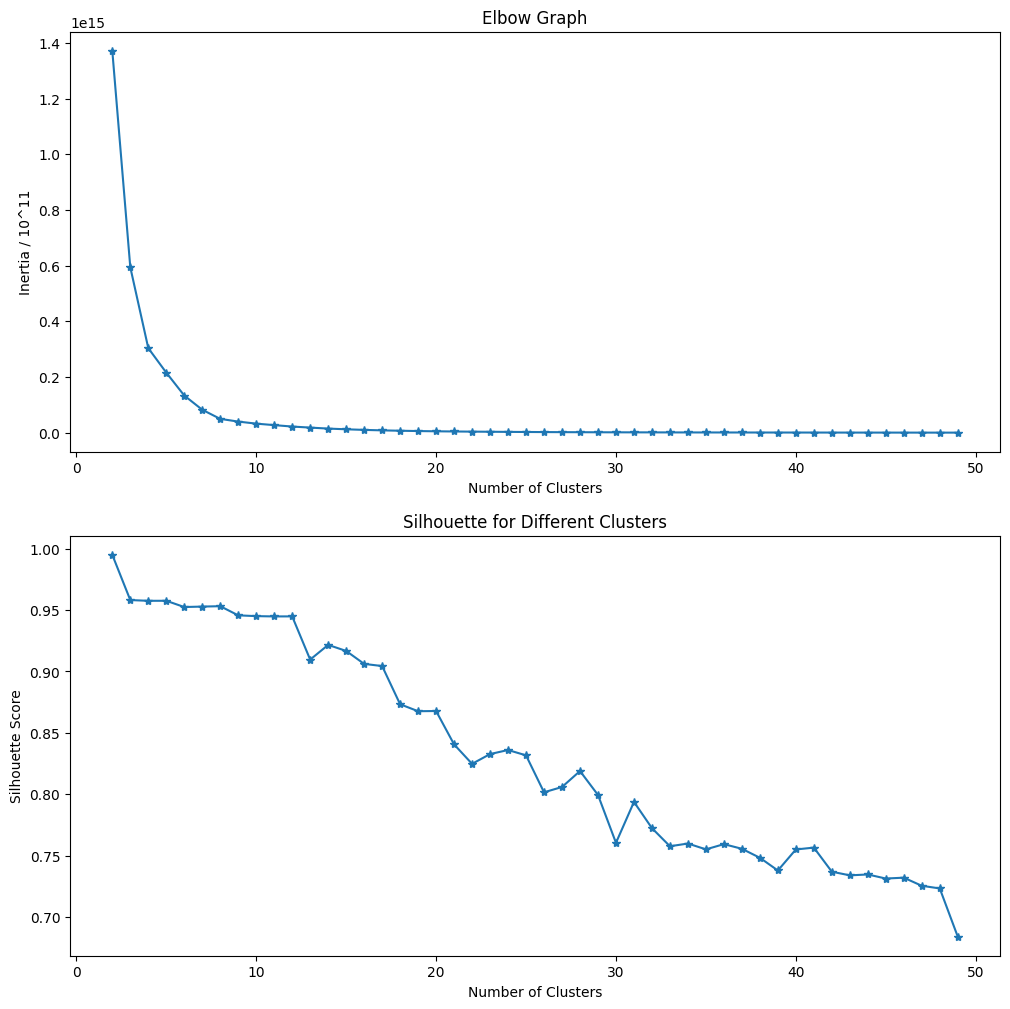

In [ ]:
#Exploring KMeans
def kmeans_eval(X):
    inertia_vals = [] #Generate lists
    silhouette = []
    for k in range(2,50): #Number of clusters 2 - 20
        model = KMeans(n_clusters = k, n_init = 10) #Initilize model, KMeans, 10 different initial centroids
        model.fit(X)
        s = silhouette_score(X,model.labels_)
        i = model.inertia_
        inertia_vals.append(i) #Append values
        silhouette.append(s)
        print(f'Number of clusters: {k}, Inertia: {np.around(i,3)}, Silhouette: {np.around(s,3)}')

    fig, ax = plt.subplots(2,1,figsize=(12,12))
    ax[0].set_title('Elbow Graph')  #Graph inertia like Figure 9-8
    ax[0].set_xlabel('Number of Clusters')
    ax[0].set_ylabel('Inertia / 10^11')
    ax[0].plot(range(2,50),inertia_vals,marker="*")
    ax[1].set_title('Silhouette for Different Clusters') #Graph silhouette like Figure 9-9
    ax[1].set_xlabel('Number of Clusters')
    ax[1].set_ylabel('Silhouette Score')
    ax[1].plot(range(2,50),silhouette,marker="*")
    plt.show


kmeans_eval(X_train) #Run

## Probando con K = 3

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [ ]:
# Initialize KMeans with 3 clusters
kmeans4 = KMeans(n_clusters=3)
# Fit the model to your data (X_train)
kmeans4.fit(X_train2)
#
y_pred2 = kmeans4.fit_predict(X_test2)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
#Get the cluster assignments for each data point
labels = kmeans4.labels_
labels

array([0, 0, 0, ..., 0, 0, 1], dtype=int32)

 ### Probando PCA y visualizacion

In [ ]:
from sklearn.decomposition import PCA

# Initialize PCA with 2 components
pca2 = PCA(n_components=2)

# Fit and transform the data
X_train_pca2 = pca.fit_transform(X_train2)
X_test_pca2 = pca.transform(X_test2)

In [ ]:
import pandas as pd

# Create a DataFrame with PCA results and cluster labels for test data
df_pca2 = pd.DataFrame(X_test_pca2, columns=['PC1', 'PC2'])
df_pca2['Cluster'] = y_pred2

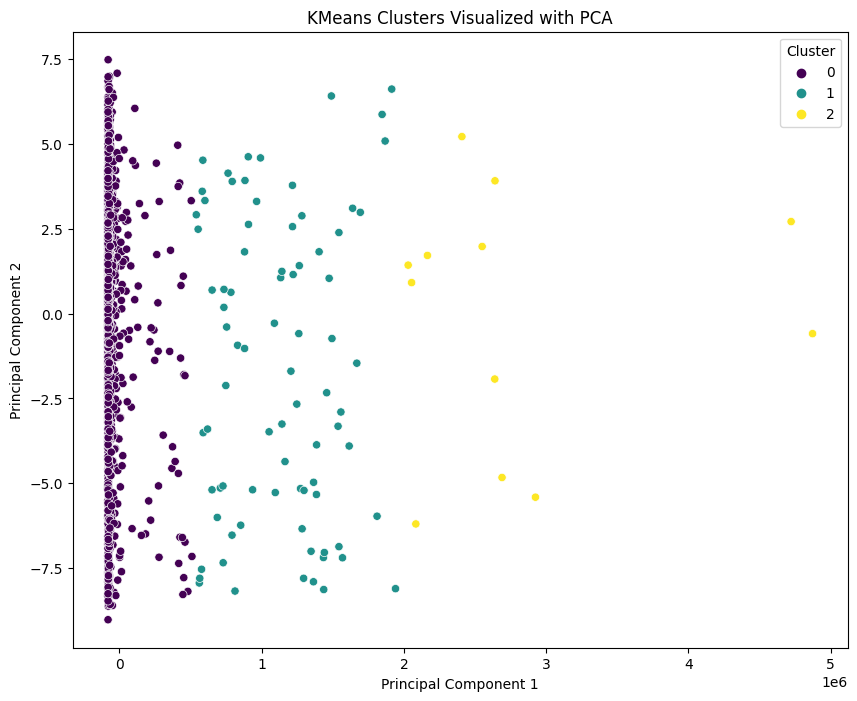

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a scatter plot
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=df_pca2, palette='viridis')

# Add titles and labels
plt.title('KMeans Clusters Visualized with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Show the plot
plt.show()

## Probando con K = 5

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [ ]:
# Initialize KMeans with 3 clusters
kmean_clf = KMeans(n_clusters = 5)
# Fit the model to your data (X_train)
kmean_clf.fit(X_train2)
#
y_pred2 = kmean_clf.fit_predict(X_test2)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
#Get the cluster assignments for each data point
labels = kmean_clf.labels_
labels

array([0, 0, 0, ..., 0, 0, 4], dtype=int32)

 ### Probando PCA y visualizacion

In [ ]:
from sklearn.decomposition import PCA

# Initialize PCA with 2 components
pca2 = PCA(n_components=2)

# Fit and transform the data
X_train_pca2 = pca2.fit_transform(X_train2)
X_test_reduced = pca2.transform(X_test2)

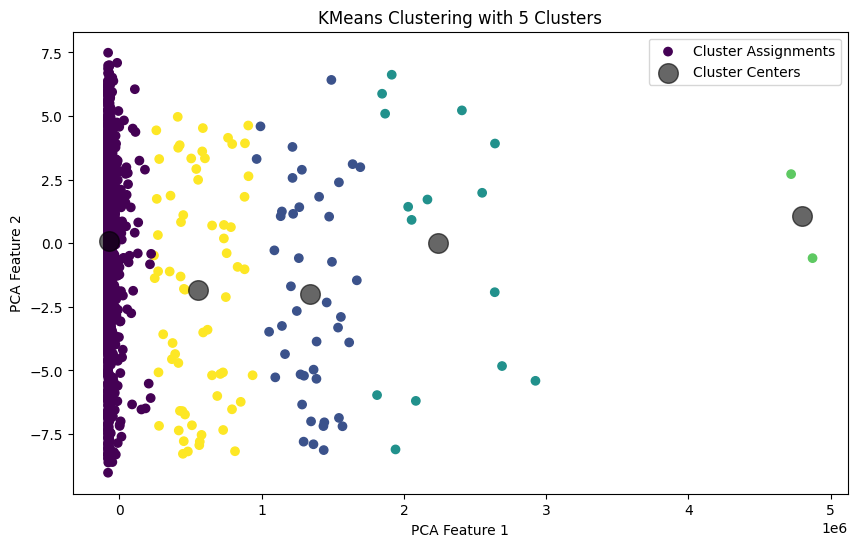

In [ ]:
# Plotting the results
plt.figure(figsize=(10, 6))

# Plot the reduced data points
plt.scatter(X_test_reduced[:, 0], X_test_reduced[:, 1], c=y_pred2, cmap='viridis', label='Cluster Assignments')

# Mark the cluster centers
centers = pca.transform(kmean_clf.cluster_centers_)
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.6, label='Cluster Centers')

plt.title('KMeans Clustering with 5 Clusters')
plt.xlabel('PCA Feature 1')
plt.ylabel('PCA Feature 2')
plt.legend()
plt.show()

In [ ]:
import pandas as pd

# Create a DataFrame with PCA results and cluster labels for test data
df_pca2 = pd.DataFrame(X_test_pca2, columns=['PC1', 'PC2'])
df_pca2['Cluster'] = y_pred2

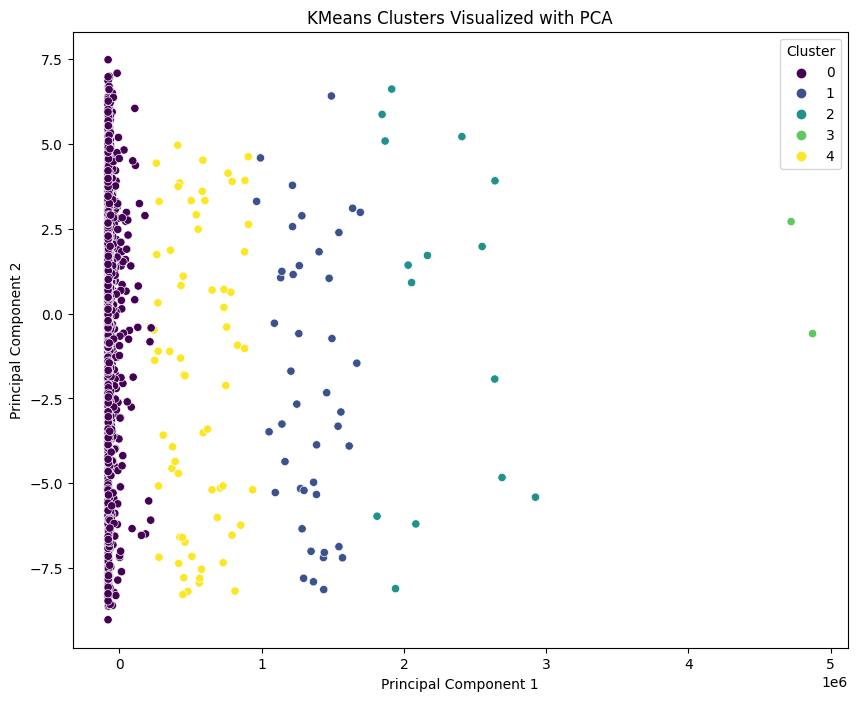

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a scatter plot
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=df_pca2, palette='viridis')

# Add titles and labels
plt.title('KMeans Clusters Visualized with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Show the plot
plt.show()